<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: center; position: absolute; right: 20px;color: #0a0a0a; ">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    KNN & Naive Bayes <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">  --

<div style="background-color: grey; color: black; padding: 10px;">
    <h4>

<b>AGENDA</b> 

1.  
2.  
3.  
4.  

<div style="background-color: grey; color: black; padding: 10px;">
    <h4><b>Skills Covered</b> <p><p>

- ...

<div style="background-color: grey; color: black; padding: 10px;">
    <h4><b>Learning Outcomes</b> <p><p>

By the end of this lesson, you should be able to:

- Explain the idea of **K-Nearest Neighbors (KNN)**:
  - How “nearest neighbors” are used to make predictions
  - What the **distance** means
  - How the choice of **k** affects the model
- Understand **Naive Bayes**:
  - Basic **conditional probability** intuition
  - What the “naive” independence assumption is
- Train and evaluate **KNN** and **Naive Bayes** on the **Iris dataset**
- Compare their performance using:
  - **Accuracy**
  - **Confusion matrix**
  - **Classification report** (precision, recall, F1-score)

<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100px; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    What’s one thing you love doing with your friends?
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->

</div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>   Quick Recap: Classification

We are dealing with **classification** problems:

- Input: features (e.g., flower measurements)
- Output: category / class (e.g., Iris-setosa, Iris-versicolor, Iris-virginica)

We already saw:

- Logistic Regression  
- Decision Trees & Random Forests

Today:

- **K-Nearest Neighbors (KNN)** – a “memory-based” model
- **Naive Bayes** – a simple probability-based model

Both are commonly used baselines and are very useful to know.

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>   Intuition: K-Nearest Neighbors (KNN)

Imagine we have a 2D plot of points:

- Each point = a flower.
- Color = species (red, green, blue).

Now a **new point** (unknown species) appears.  
How do we classify it?

**KNN idea:**

1. Look at the **K closest existing points** (neighbors).
2. Let them **vote** on the class.
3. The **majority class** wins.

Key parts:

- **Distance**: usually Euclidean distance (straight-line distance).
- **K (number of neighbors)**:
  - Small K (e.g., 1):
    - Very flexible, can fit noisy patterns
    - Risk: overfitting, very sensitive to noise
  - Large K (e.g., 15, 20):
    - Smoother, more stable
    - Risk: underfitting, ignores local details

Also:

- KNN is sensitive to the **scale** of features.
  - If one feature has values 0–1000 and another 0–1, the large scale dominates distance.
  - So we often **scale/standardize** features before using KNN.

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Dataset: Iris (Again)

We will use the classic **Iris dataset**:

- 150 flowers
- 4 features:
  - sepal length
  - sepal width
  - petal length
  - petal width
- 3 classes (species):
  - Iris-setosa
  - Iris-versicolor
  - Iris-virginica

We’ll:

1. Load the dataset.
2. Split into **train** and **test** sets.
3. Train **KNN** and **Naive Bayes**.
4. Compare them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [2]:
plt.rcParams["figure.figsize"] = (7, 5)
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data               # features
y = iris.target             # labels (0, 1, 2)
class_names = iris.target_names

print("Feature matrix shape:", X.shape)   # (150, 4)
print("Target shape:", y.shape)
print("Classes:", class_names)

Feature matrix shape: (150, 4)
Target shape: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


In [4]:
# View as a DataFrame

df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris["species"] = y
df_iris["species_name"] = df_iris["species"].map(lambda i: class_names[i])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Train/Test Split



We’ll split:

- 80% for training
- 20% for testing

We use `stratify=y` to keep class balance similar in train and test.

In [5]:
# 6.1 Train/test split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train_raw.shape[0])
print("Test size :", X_test_raw.shape[0])


Train size: 120
Test size : 30


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>   KNN – Training and Evaluation

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>   Scaling Features

Because KNN uses **distance**, we **scale** features:

- We’ll use **StandardScaler** to make each feature:
  - Mean ≈ 0
  - Standard deviation ≈ 1

We must:

1. Fit the scaler on the **training data only**.
2. Transform both **train and test** with that scaler.

In [6]:
# Scale features for KNN

scaler = StandardScaler()

# Fit on training data, then transform
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Quick check: means should be ~0, std ~1 for training data
print("Training feature means (approx):", X_train.mean(axis=0))
print("Training feature stds (approx):", X_train.std(axis=0))


Training feature means (approx): [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
Training feature stds (approx): [1. 1. 1. 1.]


#### Train KNN (start with k = 5)

Steps:

1. Create `KNeighborsClassifier` with `n_neighbors=5`.
2. Fit on scaled training data.
3. Predict on test data.
4. Compute accuracy, confusion matrix, and classification report.

In [7]:
# Train and evaluate KNN (k=5)

k = 5
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"=== KNN (k = {k}) on Iris ===")
print(f"Accuracy: {acc_knn:.3f}")
print("\nConfusion Matrix (KNN):\n", cm_knn)
print("\nClassification Report (KNN):\n")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

=== KNN (k = 5) on Iris ===
Accuracy: 0.933

Confusion Matrix (KNN):
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report (KNN):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



#### How Does k Affect Accuracy?

Let’s quickly see how accuracy changes as we change **k**.

We’ll try k from 1 to 15 and plot accuracy on the **test set**.

This helps students see:

- Very small k (e.g., 1) might overfit.
- Very large k might underfit.


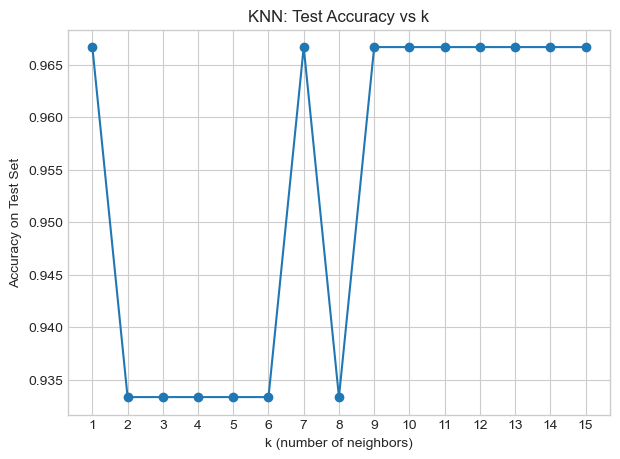

k= 1 -> Accuracy=0.967
k= 2 -> Accuracy=0.933
k= 3 -> Accuracy=0.933
k= 4 -> Accuracy=0.933
k= 5 -> Accuracy=0.933
k= 6 -> Accuracy=0.933
k= 7 -> Accuracy=0.967
k= 8 -> Accuracy=0.933
k= 9 -> Accuracy=0.967
k=10 -> Accuracy=0.967
k=11 -> Accuracy=0.967
k=12 -> Accuracy=0.967
k=13 -> Accuracy=0.967
k=14 -> Accuracy=0.967
k=15 -> Accuracy=0.967


In [8]:
# Test different k values

k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure()
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN: Test Accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()

for k, acc in zip(k_values, accuracies):
    print(f"k={k:2d} -> Accuracy={acc:.3f}")

#### How to explain this plot

- Each point = accuracy for a specific k.
- If accuracy is:
  - High for small k, then drops → maybe overfitting at very low k.
  - Highest at some middle k (e.g., 3–7) → good balance.
  - Low for very large k → model too simple, underfitting.

You don’t need to be very strict about “best k” here.  
Main goal: show that **k matters** and is a **hyperparameter** we can tune.

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>  Naive Bayes 

It uses **Bayes’ Theorem** (conceptually):

![image-2.png](https://miro.medium.com/max/1200/1*ZW1icngckaSkivS0hXduIQ.jpeg)

What each term means (plain)

- 𝑃(𝐴) = your starting belief that A is true (before seeing B). (prior)

- 𝑃(𝐵∣𝐴) = chance you would see evidence B if A were true. (likelihood)

- P(B) = chance of seeing evidence B overall, no matter what. (normalizer)

- P(A∣B) = your updated belief that A is true after seeing B. (posterior)

> Bayes’ Theorem is just a clean way to update a probability when you get new evidence. What is the probability of something happening, if something has already happened. 

- https://www.3blue1brown.com/lessons/bayes-theorem
- https://www.youtube.com/watch?v=HZGCoVF3YvM
- 

### **Naive Bayes**
- is a **probability-based** classifier model.  (used mainly for classification, not regression)

![img](https://mlarchive.com/wp-content/uploads/2023/06/Implementing-Naive-Bayes-Classification-using-Python-1-1-1024x562.png)

- https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/
- 
- 
- 
- 

Think of it as a very fast “probability-based guesser” that answers:

> “Given these features, which class is most likely?”

- It computes how likely the features are under each class.
- Then chooses the class with the **highest probability**.

The “**Naive**” part: Why is it called Naive?

- It assumes that **all features are independent given the class.**
- This is almost never fully true in real life…

Example (spam detection):

Given the email is spam, the word “free” and “winner” are treated as independent signals.



> - But surprisingly, Naive Bayes still works very well in many situations (especially text classification).

For Iris:

- Naive Bayes will model each class (species) using a **Gaussian (Normal) distribution** for each feature (Gaussian Naive Bayes).

We’ll use **Gaussian Naive Bayes** on the same Iris data.

Note:

- Naive Bayes is not distance-based like KNN.
- It doesn’t strictly require scaling.
- We’ll use the **raw features** (`X_train_raw`, `X_test_raw`) for simplicity.

Steps:

1. Create `GaussianNB`.
2. Fit on training data.
3. Predict on test data.
4. Compute accuracy, confusion matrix, classification report.

In [9]:
# Train and evaluate Gaussian Naive Bayes

nb_clf = GaussianNB()
nb_clf.fit(X_train_raw, y_train)

y_pred_nb = nb_clf.predict(X_test_raw)

acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("=== Gaussian Naive Bayes on Iris ===")
print(f"Accuracy: {acc_nb:.3f}")
print("\nConfusion Matrix (Naive Bayes):\n", cm_nb)
print("\nClassification Report (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=class_names))

=== Gaussian Naive Bayes on Iris ===
Accuracy: 0.967

Confusion Matrix (Naive Bayes):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report (Naive Bayes):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

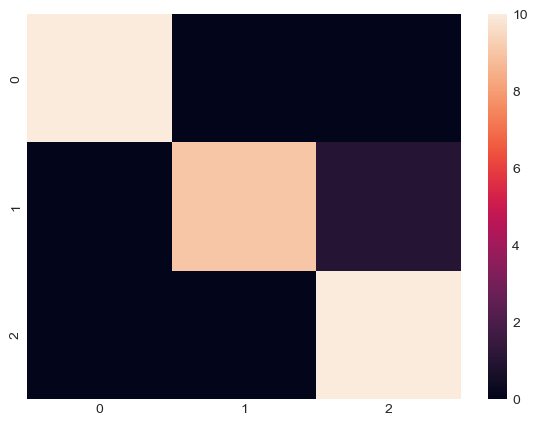

In [11]:
import seaborn as sns
sns.heatmap(cm_nb)

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>  Comparing KNN and Naive Bayes

Let’s put their accuracies and confusion matrices side by side (textually).

Questions to discuss with students:

- Which model has higher accuracy on this dataset?
- Do they misclassify the **same** species or different ones?
- Which model is:
  - Easier to understand?
  - Faster to train?
  - More sensitive to feature scaling?

In [10]:
# Simple comparison printout

print("=== Summary: KNN vs Naive Bayes on Iris ===")
print(f"KNN  (k=5) Accuracy : {acc_knn:.3f}")
print(f"Naive Bayes Accuracy: {acc_nb:.3f}")

print("\nConfusion Matrix – KNN:\n", cm_knn)
print("\nConfusion Matrix – Naive Bayes:\n", cm_nb)


=== Summary: KNN vs Naive Bayes on Iris ===
KNN  (k=5) Accuracy : 0.933
Naive Bayes Accuracy: 0.967

Confusion Matrix – KNN:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Confusion Matrix – Naive Bayes:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


> ### Quick Interpretation Guide 

**Confusion Matrix (3-class case):**

Rows = true classes  
Columns = predicted classes  

For Iris:

- Row 0 = true Setosa
- Row 1 = true Versicolor
- Row 2 = true Virginica

Reading an example:

- If at row 1, column 2 you see “2”, it means:
  > 2 Versicolor samples were predicted as Virginica.

What to look for:

- Big numbers on the **diagonal** = many correct predictions.
- Off-diagonal numbers = **confusions** between classes.

**Classification Report:**

For each class:

- **precision** – when we say “this is Setosa”, how often are we correct?
- **recall** – of all actual Setosa, how many did we find?
- **F1-score** – balance between precision and recall.

You don’t need to memorize the formulas right now; focus on **intuition**.

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3> Summary

**KNN:**

- Very simple idea: look at neighbors, majority vote.
- Works well when:
  - Data is not too high-dimensional.
  - You have a good distance measure.
  - You can scale features properly.
- Cons:
  - Prediction can be slow on large datasets (needs to look at many neighbors).
  - Sensitive to **scale** and **choice of k**.

**Naive Bayes:**

- Simple **probabilistic** model.
- Fast to train and predict.
- Works surprisingly well:
  - Especially in **text classification** (spam filtering, sentiment, etc.).
- Assumes feature **independence** given the class (naive assumption).
  - Not always true, but still often effective.

In practice:

- Try both as **baseline models**.
- Compare with other models (Logistic Regression, Trees, Random Forests).
- Use whichever balances **simplicity**, **speed**, and **accuracy** for your problem.

<div class="alert alert-block alert-warning">
    <b><font size="5"> Live Exercise</font> </b>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

Now it's your turn!
#### Exercise 1 – Try Different Distance Settings in KNN (Optional)

1. In `KNeighborsClassifier`, try:
   - `metric="euclidean"` (default)
   - `metric="manhattan"`
2. For a fixed k (e.g., k=5), compare accuracy.
3. Does changing the distance metric change the performance?

### Task 2 – Try KNN Without Scaling

1. Train KNN directly on `X_train_raw`, `X_test_raw` **without** StandardScaler.
2. Compare accuracy with the scaled version.
3. Discuss: What does this say about the importance of **scaling** for KNN?

### Task 3 – Use Naive Bayes on a Different Dataset

1. Use `load_wine()` dataset from scikit-learn.
2. Train a `GaussianNB` classifier.
3. Compute accuracy and confusion matrix.
4. Compare how Naive Bayes performs on Wine vs Iris.

<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>_________________________________END________________________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h4> Live Exercise Solutions
        
</h4> </div>

#### Task 1 solution

#### Task 2 solution

<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->